# Doing Exploratory Data Analysis and model selection for data [daily-bike-share](https://www.kaggle.com/datasets/deepushah/bike-share-daily)


In [1]:
# importing necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# reading csv
df = pd.read_csv('/kaggle/input/bike-share-daily/daily-bike-share_1.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/bike-share-daily/daily-bike-share_1.csv'

In [ ]:
# how does the data look
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [ ]:
# droping of instant that is a id cloumn, which is not neccessary for the analysis and model
df.drop(['instant'], axis=1, inplace=True)
df.shape


(731, 13)

In [ ]:
# checking the nuumber of rows, data type, Null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  rentals     731 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.4+ KB


In [ ]:
# checking the central tendencies of the data
df.describe()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


## From the statistics provided, we can gather the following insights:

1. Count: There are 731 instances in the dataset, indicating that we have data for 731 different days.

2. Mean: The mean values give us an average representation of the data. For example:
   - The average season value is around 2.5, indicating a roughly equal distribution of the four seasons.
   - The average yr value is close to 0.5, suggesting that the data might represent two consecutive years.
   - The mean value for rentals is approximately 848, indicating an average number of rentals per day.
3. Standard Deviation (Std): The standard deviation provides information about the variability or dispersion of the data. A higher standard deviation implies a greater spread of values from the mean. For example:
   - The standard deviation for rentals is around 686, indicating a relatively large variation in the number of rentals on different days.
4. Minimum (Min) and Maximum (Max): These values represent the minimum and maximum values observed for each variable. For example:
   - The minimum value for the rentals column is 2, suggesting that there was at least one day with very few rentals.
   - The maximum value for rentals is 3410, indicating a day with exceptionally high rental activity.
5. Percentiles (25%, 50%, 75%): These values provide insights into the distribution of the data by dividing it into quartiles. For example:
   - The 50th percentile (median) for rentals is 713, indicating that 50% of the rental values fall below this value.
   - The 25th and 75th percentiles suggest the range within which the middle 50% of the rental values fall.


In [ ]:
# droping date cloumn and atemp column which is very corelated with temp, so its better to keep one
df.drop(['dteday', 'atemp'], axis=1, inplace=True)


In [ ]:
# checking the co relation between the coloumns
correlation = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.205445,-0.229046,0.210399
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,-0.110651,-0.011817,0.248546
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.222204,-0.207502,0.123006
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.015937,0.006292,0.054274
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.052232,0.014282,0.059923
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.024327,-0.018796,-0.518044
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,0.591045,0.039511,-0.247353
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.126963,-0.157944,0.543285
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,1.000000,-0.248489,-0.077008
windspeed,-0.229046,-0.011817,-0.207502,0.006292,0.014282,-0.018796,0.039511,-0.157944,-0.248489,1.000000,-0.167613


In [ ]:
# removing the unnecessary columns
data = df[['season', 'workingday', 'weathersit', 'temp', 'rentals',
           'hum', 'windspeed', 'weekday', 'holiday', 'mnth', 'yr']]
data = data.iloc[1:, :]


In [ ]:
X = data.drop(['rentals'], axis=1)
y = data['rentals']


Text(0, 0.5, 'Rentals')

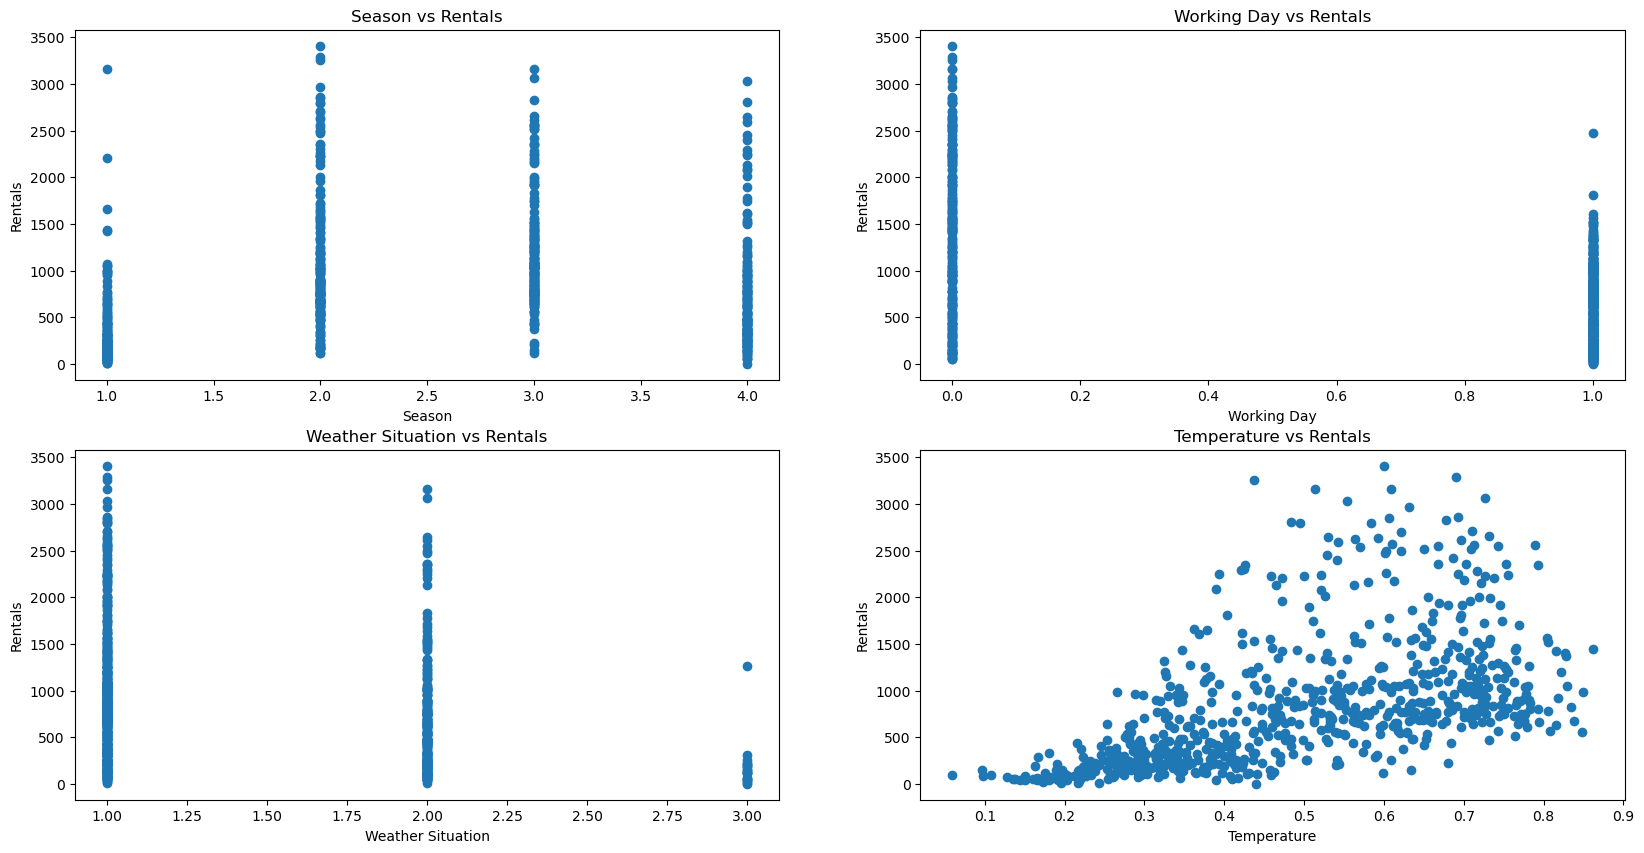

In [ ]:
# plottig feature vs target
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.scatter(X['season'], y)
plt.title('Season vs Rentals')
plt.xlabel('Season')
plt.ylabel('Rentals')

plt.subplot(2, 2, 2)
plt.scatter(X['workingday'], y)
plt.title('Working Day vs Rentals')
plt.xlabel('Working Day')
plt.ylabel('Rentals')

plt.subplot(2, 2, 3)
plt.scatter(X['weathersit'], y)
plt.title('Weather Situation vs Rentals')
plt.xlabel('Weather Situation')
plt.ylabel('Rentals')

plt.subplot(2, 2, 4)
plt.scatter(X['temp'], y)
plt.title('Temperature vs Rentals')
plt.xlabel('Temperature')
plt.ylabel('Rentals')


<Axes: xlabel='temp', ylabel='rentals'>

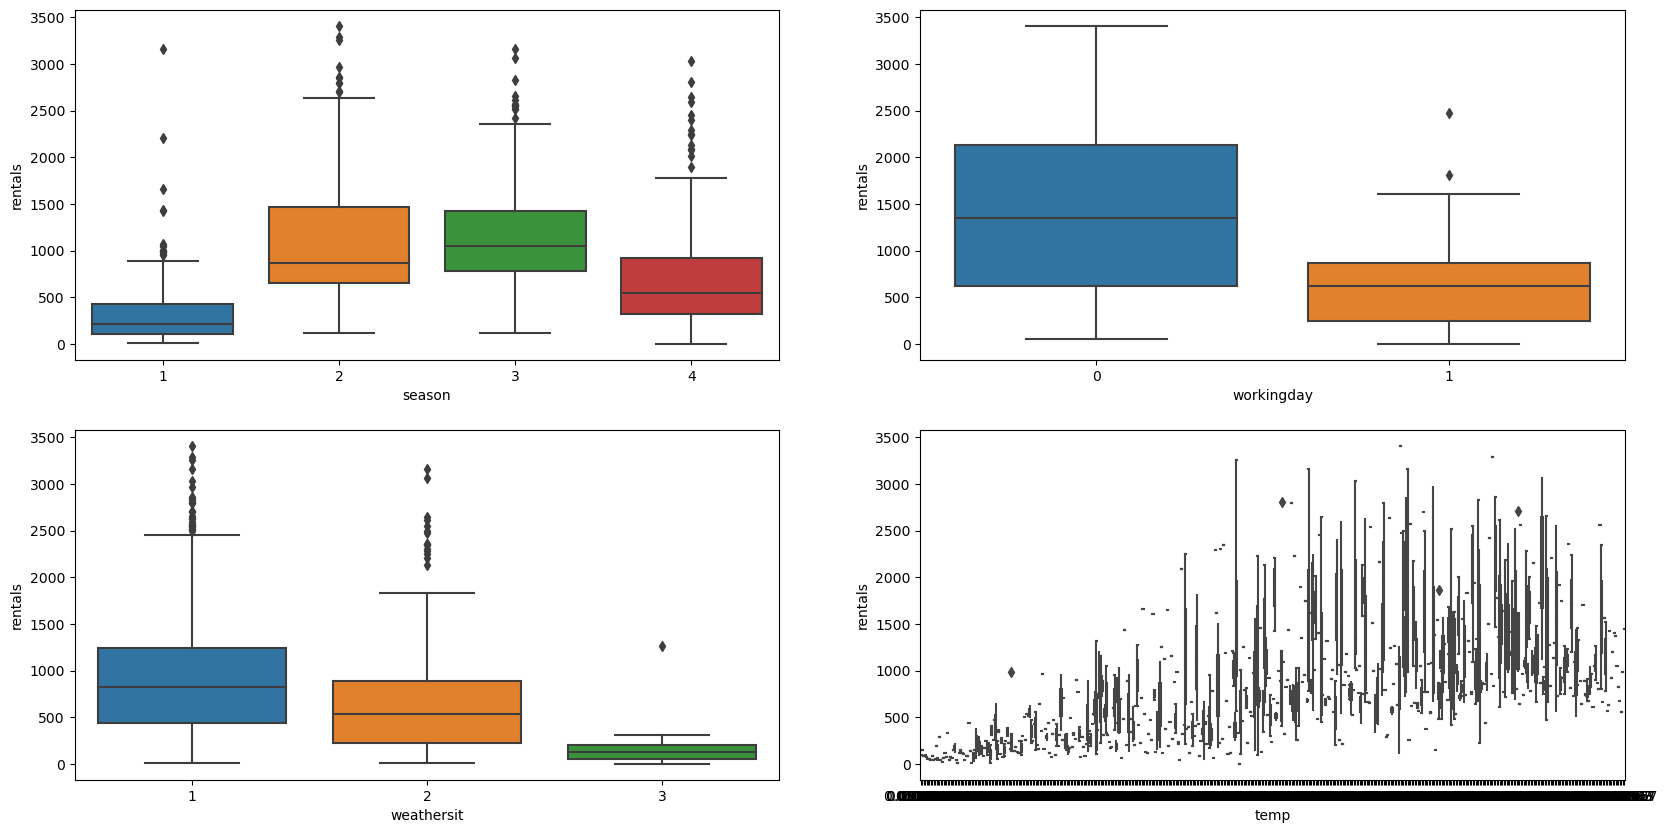

In [ ]:
# boxplot
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='season', y='rentals', data=data)
plt.subplot(2, 2, 2)
sns.boxplot(x='workingday', y='rentals', data=data)
plt.subplot(2, 2, 3)
sns.boxplot(x='weathersit', y='rentals', data=data)
plt.subplot(2, 2, 4)
sns.boxplot(x='temp', y='rentals', data=data)


In [ ]:
# chosing the best model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))


0.7104292989955758
137830.0918584946
286.3403710603559


In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))


0.6423580650149392
170230.69178082192
253.4041095890411


In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))


0.849931212306376
71429.86055273973
175.47623287671232


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))


0.8626319064795914
65384.5740700642
176.87247940687956


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))


0.7737053377070069
107711.91278241137
259.00613743098006


In [ ]:
from sklearn.ensemble import BaggingRegressor

reg = BaggingRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))


0.8423712523196125
75028.25630136985
182.47123287671232


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

reg = HistGradientBoostingRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))


0.8676367219914203
63002.37801453285
167.19718818717442


### From the various Regressor model HistGradientBoostingRegressor is the best with 0.86 R2_score and 63000 MSR